In [13]:
%%javascript
var width = window.innerWidth || document.documentElement.clientWidth || document.body.clientWidth;
var height = window.innerHeight || document.documentElement.clientHeight || document.body.clientHeight;

IPython.notebook.kernel.execute("windowSize = (" + width + "," + height + ")");
// suitable for small screens
nbpresent.mode.tree.set(
    ["app", "theme-manager", "themes", "my-theme"], 
    {
    palette: {
        "blue": { id: "blue", rgb: [0, 153, 204] },
        "black": { id: "black", rgb: [0, 0, 0] },
        "white": { id: "white", rgb: [255, 255, 255] },
        "red": { id: "red", rgb: [240, 32, 32] },
        "gray": { id: "gray", rgb: [128, 128, 128] },
    },
    backgrounds: {
        "my-background": {
            "background-color": "white"
        }
    },
    "text-base": {
        "font-family": "Georgia",
        "font-size": 3
    },
    rules: {
        h1: {
            "font-size": 5.5,
            color: "blue",
            "text-align": "center"
        },
        h2: {
            "font-size": 3,
            color: "blue",
            "text-align": "center"
        },
        h3: {
            "font-size": 3,
            color: "black",
        },
        "ul li": {
            "font-size": 3,
            color: "black"
        },
        "ul li ul li": {
            "font-size": 2.5,
            color: "black"
        },
        "code": {
            "font-size": 2,
        },
        "pre": {
            "font-size": 2,
        }
    }
});

<IPython.core.display.Javascript object>

# Preface

The genomes needed to run this notebook should be downloaded from the following link and saved in a subdirectory of the directory from where you are running this notebook named "data".

1. <a href="http://csbio.unc.edu/mcmillan/Comp555S18/data/ThermotogaPetrophila.fa"><i>Thermotoga Petrophila</i></a>
2. <a href="http://csbio.unc.edu/mcmillan/Comp555S18/data/VibrioCholerae.fa"><i>Vibrio Cholerae</i></a>
3. <a href="http://csbio.unc.edu/mcmillan/Comp555S18/data/EscherichiaColi.fa"><i>Escherichia Coli</i></a>

# Where does DNA Replication Begin?

*continued from last time...*

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/WhereToBegin.png" width="500px" class="centeredImg">

After a couple of false starts, we continue on our quest to develop an algorithm for finding the origin of replication, *OriC*, locus in a DNA sequence.

<p style="text-align: right; clear: right; margin-right: 200px;">1</p>

# Let's take a closer look at the biology
<div style="font-size: 80%;">
Recall DNA Strands have Directions:
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/DirectionalDNA.png" width="500px" class="centeredImg">
</div>
<p style="text-align: right; clear: right; margin-right: 200px;">2</p>


# DNA Polymerases do the copying
<div style="font-size: 80%;">
Once the DNA strands are pulled apart the process of replication begins. It proceeds in both directions on both strands and contines until the center of termimination, *terC*, is reached.
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/WrongModel.png" width="500px" class="centeredImg">
But it doesn't exactly progress symmetrically in both directions. DNA polymerases, the proteins which actually copy the strands, operate unidirectionally. They first must attach to specific subsequences, called *primers*. Once they begin, they copy the attached strands along the (3’ &rarr; 5’) direction.
</div>
<p style="text-align: right; clear: right; margin-right: 200px;">3</p>

# Replication progresses in one direction
<div style="font-size: 80%;">
Beginning at the *oriC* locus the DNA molecule is pulled apart and two DNA polymerases, one on each strand begin copying on each strand.
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/RepStarts.png" width="500px" class="centeredImg">
As they progress the DNA separates more. The boundrary of the separation between single-stranded and double-stranded DNA is called the ***replication fork***. Eventually, this separation exposes a significantly large single-stranded DNA on the trailing edge of each strand.
</div>
<p style="text-align: right; clear: right; margin-right: 200px;">4</p>

# Once the replication fork opens enough...
<div style="font-size: 80%;">
This open region of single-stranded DNA eventually allows a second phase of the replication process to begin. A second DNA polymerase detects a primer sequence, and then start replicating the exposed sequence Ahead of it and works towards the beginning of the previous replication primer. However, this DNA polymerase does not have too far to go.
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Strand2.png" width="500px" class="centeredImg">
<br>
</div>
<p style="text-align: right; clear: right; margin-right: 200px;">5</p>

# When opened a little more
<div style="font-size: 80%;">
As the initial, or *Leading*, polymerase continues to copy its half strand more of the complement strand is exposed, which sets off the process over and over again until the termination center is reached.
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Continue.png" width="500px" class="centeredImg">
<br>
These short partial copys are called ***Okazaki fragments*** and they lie along the *Lagging* half-strand of the replication.
</div>
<p style="text-align: right; clear: right; margin-right: 200px;">6</p>

# Eventually the whole genome is replicated
<div style="font-size: 80%;">
The lengths of Okazaki fragments in prokaryotes and eukaryotes differ. Prokaryotes tend to have longer Okazaki fragments (&approx; 2,000 nucleotides long) than eukaryotes (100 to 200 nucleotides long).
<br>
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/FinishedRep.png" width="500px" class="centeredImg">
<br>
Once completed, the adjacent Okazaki fragments are joined by another important protein called a *DNA ligase*.
</div>
<p style="text-align: right; clear: right; margin-right: 200px;">7</p>

# Observations

* The *leading* half strand is copied as a single contiguous piece that progresses at a uniform rate as the DNA separates
* The other *lagging* half strand lies *exposed* while waiting for the gap to enlarge enough, and until another primer sequence appears so that another DNA polymerase can start
* Replication on the *lagging* half-strand proceeds in a stop-and-go fashion extending by one Okazaki fragment at a time
* A DNA repair mechanism then comes along to fix all of the lagging half-strand fragments

<div style="display: inline; float: right; clear: right; margin: 24px;">
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Deanimation.png" width="300"><br>
<span style="float: left;">Cytosine</span> <span style="float: right; margin-right: 32px;">Uracil</span>     
</div>

* What is the downside of leaving single-stranded DNA exposed?
<br><br>
  - Single-stranded DNA is less stable than double-stranded
  - Single-stranded DNA can potentially mutate when exposed
  - The most common mutation type is called *deanimation*
  - Deanimation tends to convert **C** nucelotides into **T** nucelotides. 
 
 <p style="text-align: right; clear: right; margin-right: 200px;">8</p>

# Now what?
## How might these observations inform a new algorithm for finding ***OriC***?

* When considering the half-strands on either side of a candidate *OriC* region what would we expect?
* More primer patterns on the lagging side to promote Okazaki fragments
* Which primer do we look for?
* Go back to our k-mer counts from last time?<br><br>
* But whatever the primer pattern is, there should be fewer Cytosines on the lagging side due to deanimation over multiple generations (replications)
* **Idea:** Look for points that divide the genome such that number of Cs in the suffix, and prefix, reverse complemented, are minimal

                                           fewer Cs -->
      5'-...CAAACCTACCACCAAACTCTGTATTGACCA|TTTTAGGACAACTTCAGGGTGGTAGGTTTC...-3'
      3'-...GTTTGGATGGTGGTTTGAGACATAACTGGT|AAAATCCTGTTGAAGTCCCACCATCCAAAG...-5'
                              <-- fewer Cs

 <p style="text-align: right; clear: right; margin-right: 200px;">9</p>

# Let's look for evidence

Recall *Thermotoga Petrophila*, from last lecture (the bacteria whose k-mers did not match the frequent ones that we found in *Vibrio Cholerae*). Let's examine the nucleotide counts on either side of its *OriC* region:


| base  |  Total  |  Forward|  Reverse |  Diff  |
|:-----:|---------|---------|----------|-------:|
|   C   |  427419 |  207901 |  219518  | -11617 |
|   G   |  413241 |  211607 |  201634  |   9973 |
|   A   |  491488 |  247525 |  243963  |   3562 |
|   T   |  491363 |  244722 |  246641  |  -1919 |


The *Lagging strand* in the primary sequence corresponds to exposed Cs in the direction of increasing indices, while Gs in the direction of decresing indices of the primary sequence correspond to Cs of the *Lagging strand*. Thus, the Lagging strands have 9973 + 11617 = 21590 fewer Cs than the Leading strands. 
<br>
<br>
<br>
<br>
<br>
<p style="text-align: right; clear: right; margin-right: 200px;">10</p>

# Code for reading sequences from last time

In [59]:
def loadFasta(filename):
    """ Parses a classically formatted and possibly 
        compressed FASTA file into a list of headers 
        and fragment sequences for each sequence contained"""
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'rb')
    else:
        fp = open(filename, 'rb')
    # split at headers
    data = fp.read().split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

<p style="text-align: right; clear: right; margin-right: 200px;">11</p>

In [60]:
header, seq = loadFasta("data/ThermotogaPetrophila.fa")

for i in xrange(len(header)):
    print header[i]
    print len(seq[i])-1, "bases", seq[i][:30], "...", seq[i][-30:]
    print

oriCStart = 786686
oriOffset = 211          # offset to the middle of OriC 

CP000702.1 Thermotoga petrophila RKU-1, complete genome
1823511 bases +AGTTGGACGAAGGTTCTGATCCCTACAGA ... TCAATGTTATAATAAATACCGTGCAAAAAC



In [63]:
# A sanity check that does not appear in the lecture
x = seq[0][oriCStart+oriOffset-30:oriCStart+oriOffset+30]
y = ''.join({'A':'T', 'C':'G', 'G':'C', 'T':'A'}[b] for b in x)
print x[:30],x[30:]
print y[:30],y[30:]

CAAACCTACCACCAAACTCTGTATTGACCA TTTTAGGACAACTTCAGGGTGGTAGGTTTC
GTTTGGATGGTGGTTTGAGACATAACTGGT AAAATCCTGTTGAAGTCCCACCATCCAAAG


<p style="text-align: right; clear: right; margin-right: 200px;">12</p>

# Counting base occurences in large strings
Here's a somewhat standard approach to counting characters in a string.

In [64]:
def getStatsV1(sequence, start):
    halflen = len(sequence)//2          
    terC = start + halflen
    # handle genome's circular nature
    if (terC > len(sequence)):
        terC = terC - len(sequence) + 1
    total = { base: 0 for base in "ACGT" }
    forwardCount = { base: 0 for base in "ACGT" }
    reverseCount = { base: 0 for base in "ACGT" }
    for position in xrange(1,len(sequence)):
        base = sequence[position]
        total[base] += 1
        if (terC > start):                                 # case #1:  ----S========T---->
            if position >= start and position < terC:
                forwardCount[base] += 1
            else:
                reverseCount[base] += 1
        else:                                              # case #2:  ====T--------S====>
            if position >= start or position < terC: 
                forwardCount[base] += 1
            else:
                reverseCount[base] += 1
    return {key: (total[key], forwardCount[key], reverseCount[key]) for key in total.iterkeys()}

<p style="text-align: right; clear: right; margin-right: 200px;">13</p>

# Another way to count

This version makes four passes, one for each base, but moves the dictionary overhead outside of the linear scan.

In [65]:
def getStatsV2(sequence, start):
    halflen = len(sequence)//2
    terC = start + halflen
    # handle genome's circular nature
    if (terC > len(sequence)):
        terC = terC - len(sequence) + 1
    stats = {}
    for base in "ACGT":
        total = sequence.count(base)
        if (terC > start):                                   # case 1: ----S========T---->
            forwardCount = sequence[start:terC].count(base)
            reverseCount = total - forwardCount
        else:                                                # case 2: ====T--------S====>
            reverseCount = sequence[terC:start].count(base)
            forwardCount = total - reverseCount
        stats[base] = (total, forwardCount, reverseCount)
    return stats

<p style="text-align: right; clear: right; margin-right: 200px;">14</p>

# Let's compare counting approaches
How much difference do you expect? Why do we care?

In [66]:
for getStats in [getStatsV1, getStatsV2]:
    answer = getStats(seq[0], oriCStart+oriOffset)
    for base in "CGAT":
        total, forwardCount, reverseCount = answer[base]
        print "%s: %8d %8d %8d %8d" % (base,total,forwardCount,reverseCount,forwardCount-reverseCount)
    %timeit getStats(seq[0], oriCStart+oriOffset)
    print

C:   427419   207901   219518   -11617
G:   413241   211607   201634     9973
A:   491488   247525   243963     3562
T:   491363   244723   246640    -1917
1 loop, best of 3: 504 ms per loop

C:   427419   207901   219518   -11617
G:   413241   211607   201634     9973
A:   491488   247525   243963     3562
T:   491363   244723   246640    -1917
10 loops, best of 3: 47 ms per loop



<p style="text-align: right; clear: right; margin-right: 200px;">16</p>

# One more contender

Python provides an optimized library called *"numpy"* for processing vectorized data. Our sequence can be considered a vector of bases.

In [67]:
import numpy

def getStatsV3(sequence, start):
    halflen = len(sequence)//2
    terC = start + halflen
    # handle genome's circular nature
    if (terC > len(sequence)):
        terC = terC - len(sequence) + 1
    genome = numpy.fromstring(sequence, dtype="uint8")
    total = numpy.bincount(genome)
    if (terC > start):
        forwardCount = numpy.bincount(genome[start:terC])
        reverseCount = total - forwardCount
    else:
        reverseCount = numpy.bincount(genome[terC:start])
        forwardCount = total - reverseCount
    return {b: (total[ord(b)],forwardCount[ord(b)],reverseCount[ord(b)]) for b in "ACGT"}

<p style="text-align: right; clear: right; margin-right: 200px;">15</p>

# Verify and time it
Always make sure that an algorithm is ***correct*** before considering its performance. 

In [68]:

answer = getStatsV3(seq[0], oriCStart+oriOffset)

for base in "CGAT":
    total, forwardCount, reverseCount = answer[base]
    print "%s: %8d %8d %8d %8d" % (base, total, forwardCount, reverseCount, forwardCount - reverseCount)
print

%timeit getStatsV2(seq[0], oriCStart+oriOffset)
%timeit getStatsV3(seq[0], oriCStart+oriOffset)

C:   427419   207901   219518   -11617
G:   413241   211607   201634     9973
A:   491488   247525   243963     3562
T:   491363   244723   246640    -1917

10 loops, best of 3: 47.2 ms per loop
100 loops, best of 3: 9.01 ms per loop


<p style="text-align: right; clear: right; margin-right: 200px;">17</p>

# A New approach for finding OriC

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/CGSkew.png" width="600px" class="centeredImg">

So let's sample the genome looking for positions where the #G - #C is maximally skewed.

<p style="text-align: right; clear: right; margin-right: 200px;">18</p>

# Counting with cummulative sums 
We'll use a vectorized cumuluative sum method to compute counts in the G-C skew genome wide. Given an input vector, V, of length N. S = V.cumsum() returns:

$$S_i = \sum\limits_{j=0}^{i} V_j$$

Cumulative sums can be used to compute counts over any interval, $Count_{[ij)} = S_j - S_i$. Example:

In [56]:
v = numpy.array(numpy.random.random(20) < 0.25, dtype="int8")    # a simulation model for DNA[i] == 'C'
s = numpy.concatenate(([0],v.cumsum()))
print v
print s
print ''.join(['[^' if (i == 5) else ']^' if (i == 15) else "  " for i in xrange(20)])
print s[15] - s[5]

[1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0]
[0 1 1 1 1 2 2 2 2 2 2 3 3 4 5 5 5 5 5 6 6]
          [^                  ]^        
3


<p style="text-align: right; clear: right; margin-right: 200px;">19</p>



# Finding the genome-wide GC skew

In [42]:
def GCSkew(sequence):
    half = len(sequence)//2
    full = len(sequence)
    genome = numpy.fromstring(sequence+sequence, dtype='uint8')
    matchC = numpy.concatenate(([0], numpy.array(genome == ord('C'), dtype="int8").cumsum()))
    matchG = numpy.concatenate(([0], numpy.array(genome == ord('G'), dtype="int8").cumsum()))
    matchGC = matchG - matchC
    skew = matchGC[half:half+full]-matchGC[0:full]+matchGC[full-half:2*full-half]-matchGC[full:2*full]
    return skew

<p style="margin-top: 12px;">Let's test it function on the short sequence: <code>CATGGGCATCGGCCATACGCC</code></p>

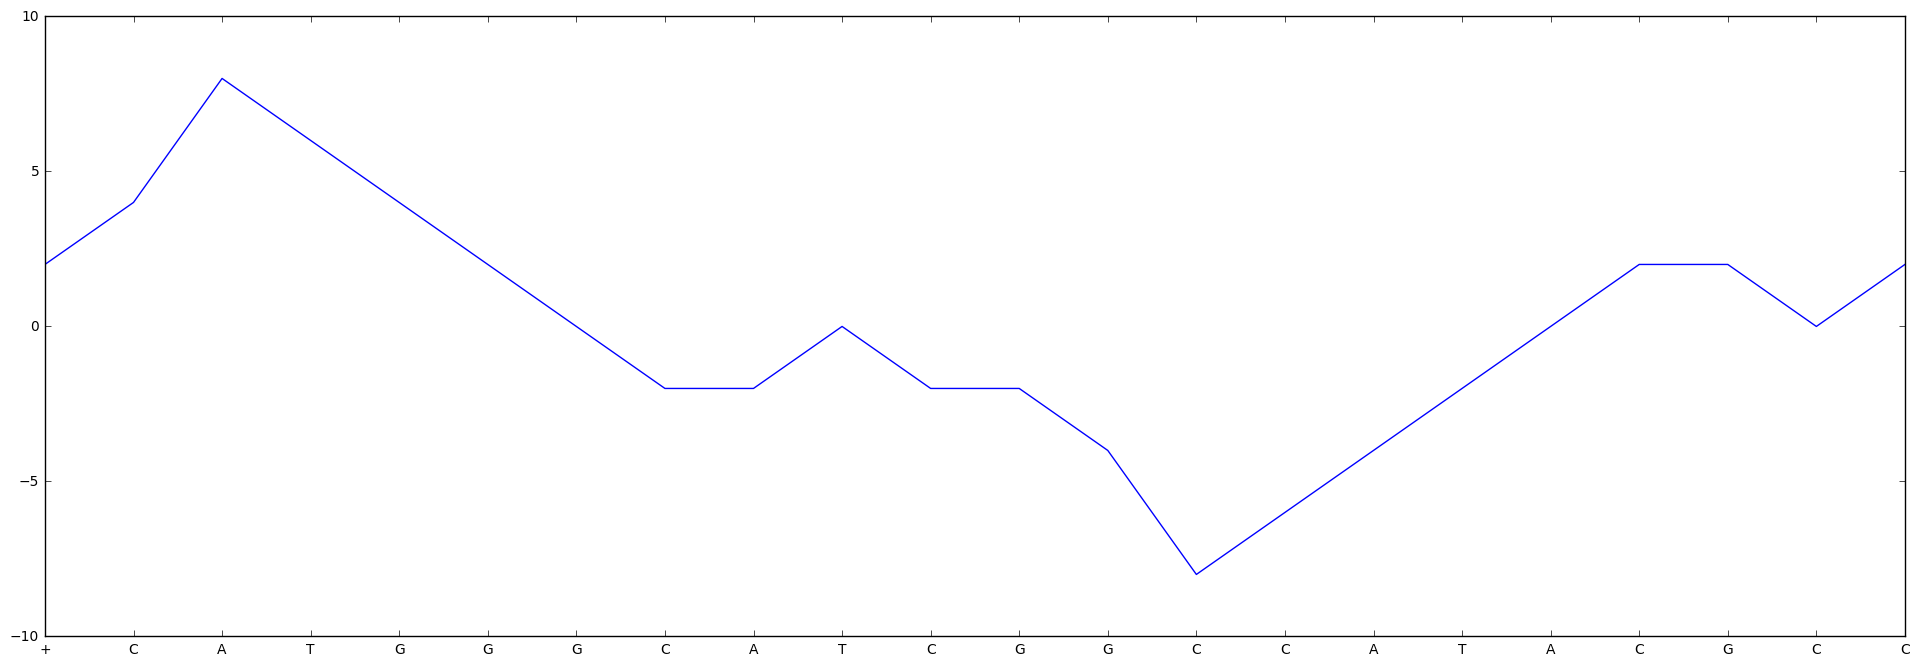

In [43]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

test = "+CATGGGCATCGGCCATACGCC"
y = GCSkew(test)
plt.figure(num=None, figsize=(24, 8), dpi=100)
plt.ylim([-10,10])
plt.xticks(range(len(test)), [c for c in test])
result = plt.plot(range(len(y)), y)

<p style="text-align: right; clear: right; margin-right: 200px;">21</p>

# Now let's revisit our genome


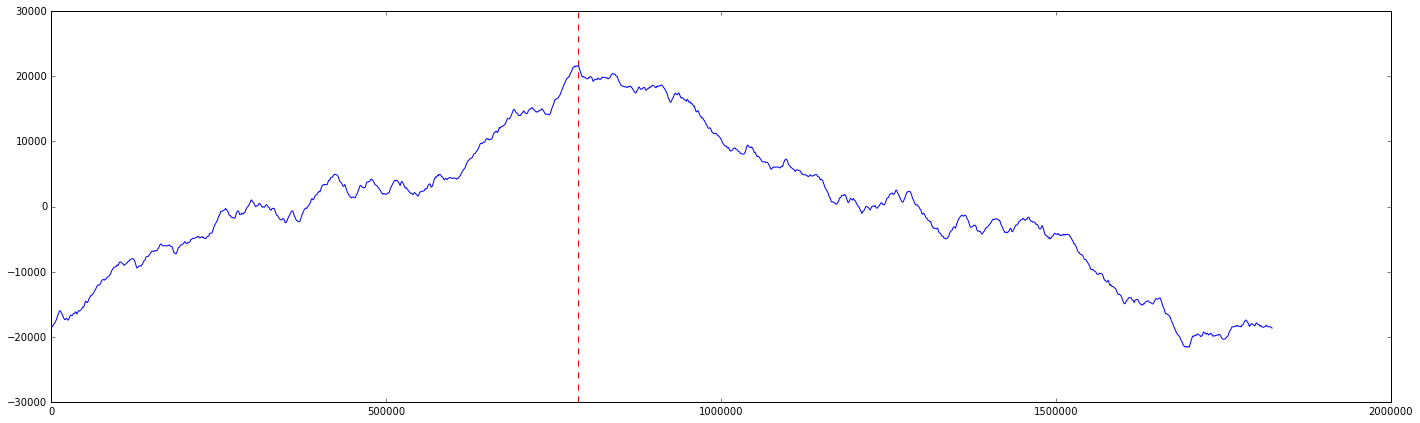

In [50]:
# Run on Thermotoga Petrophila
y = GCSkew(seq[0])
N = len(y)
plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(oriCStart+oriOffset, color="r", linestyle='--')
result = plt.plot(range(0,N,1000), y[0:N:1000])

<p style="text-align: right; clear: right; margin-right: 200px;">22</p>

# Now on the original Colera genome

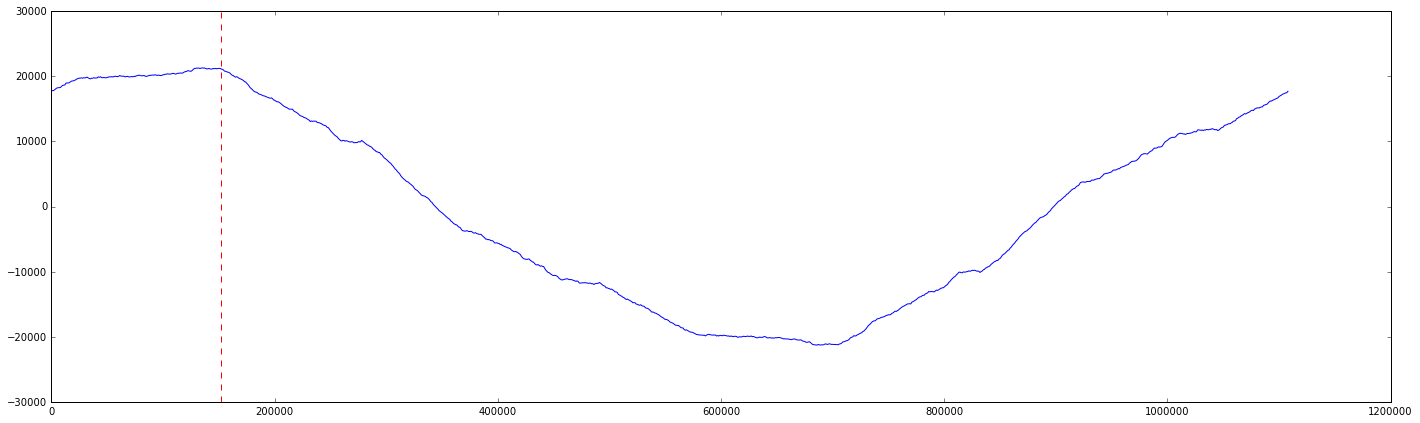

In [51]:
header, seq = loadFasta("data/VibrioCholerae.fa")
oriCStart = 151887
y = GCSkew(seq[0])
N = len(y)
plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(oriCStart, color="r", linestyle='--')
result = plt.plot(range(0,N,1000), y[0:N:1000])

<p style="text-align: right; clear: right; margin-right: 200px;">23</p>

# A 3<sup>rd</sup> "test" genome

In [47]:
header, seq = loadFasta("data/EscherichiaColi.fa")

for i in xrange(len(header)):
    print header[i]
    print len(seq[i])-1, "bases", seq[i][:30], "...", seq[i][-30:]
    print


CP003289.1 Escherichia coli O104:H4 str. 2011C-3493, complete genome
5273097 bases +CATTATCGACTTTTGTTCGAGTGGAGTCC ... GTCAACAATCATGAATGTTTCAGCCTTAGT

CP003291.1 Escherichia coli O104:H4 str. 2011C-3493 plasmid pAA-EA11, complete sequence
74217 bases +GCCTCGCAAAACATTGCTCTATTCATGCA ... TTCTGACCGTCCTGATTTCTGCTTATATAA

CP003290.1 Escherichia coli O104:H4 str. 2011C-3493 plasmid pESBL-EA11, complete sequence
88544 bases +GTTGGGATGACGCCAGACCAACCTCAAAT ... CGCCTGGTGCCAGTTCTGTATGTTTATTTT

CP003292.1 Escherichia coli O104:H4 str. 2011C-3493 plasmid pG-EA11, complete sequence
1549 bases +CTAGCTGAAAAACTTGGAGTTAGCAGAAG ... TGTGGCGCTGTCGTTGCGGATCAGCAATTT



<p style="text-align: right; clear: right; margin-right: 200px;">24</p>

# Plot the G-C skew

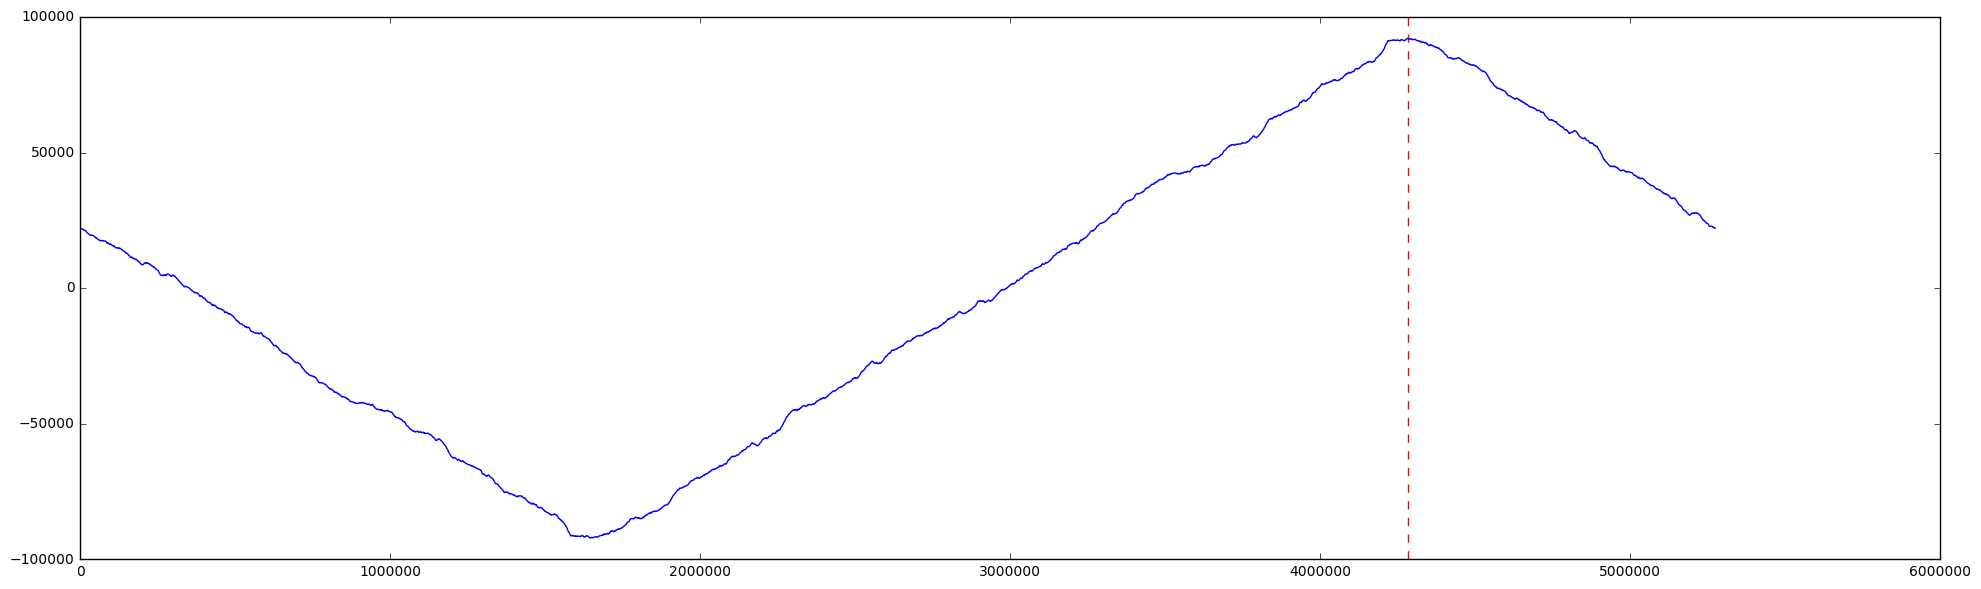

In [58]:
shift = '+'+seq[0][1000000:]+seq[0][1:1000000]    # circular shift because the oriC is too close to the start
y = GCSkew(shift)
oriCGuess = y.argmax() 
N = len(y)
plt.figure(num=None, figsize=(24, 7), dpi=100)
plt.axvline(oriCGuess, color="r", linestyle='--')
result = plt.plot(range(0,N,1000), y[0:N:1000])

<p style="text-align: right; clear: right; margin-right: 200px;">25</p>

# Did we found the OriC region of E. Coli?

The minimum of the Skew Diagram points to this region in ***E. coli***:  

    aatgatgatgacgtcaaaaggatccggataaaacatggtgattgcctcgcataacgcggta
    tgaaaatggattgaagcccgggccgtggattctactcaactttgtcggcttgagaaagacc
    tgggatcctgggtattaaaaagaagatctatttatttagagatctgttctattgtgatctc
    ttattaggatcgcactgccctgtggataacaaggatccggcttttaagatcaacaacctgg
    aaaggatcattaactgtgaatgatcggtgatcctggaccgtataagctgggatcagaatga
    ggggttatacacaactcaaaaactgaacaacagttgttctttggataactaccggttgatc
    caagcttcctgacagagttatccacagtagatcgcacgatctgtatacttatttgagtaaa
    ttaacccacgatcccagccattcttctgccggatcttccggaatgtcgtgatcaagaatgt
    tgatcttcagtg

But there are **NO** frequent 9-mers (that appear three or more times) in this region!

#### What now?

<p style="text-align: right; clear: right; margin-right: 200px;">26</p>

# *DnaA* is more forgiving than we imagined

The OriC binding sites might not have exactly repeated 9-mers, but instead 9-mers that are very close in their target sequence. The DnaA is willing to look over these small differences.

This leads to a new problem:

<div style="margin: 20px 100px; padding: 10px; background-color: #ffe0e0;">
    <em><b>Frequent Approximate k-mer Matches:</b></em> 
    Find the most frequent k-mer allowing for a small number of mismatches.<br>
    <ul>
    <b>Input:</b> A string *Text*, and integers *k* and *d*<br>
    <b>Output:</b> All most frequent k-mers with up to *d* mismatches in *Text*.
    </ul>
</div>

<p style="text-align: right; clear: right; margin-right: 200px;">27</p>

# Example: Revisiting *Vibrio Cholerae*

If we allow for just one difference in the 9-mers <code><span style="color: green; font-weight: bold;">ATGATCAAG</span></code> and <code><span style="color: blue; font-weight: bold;">CTTGATCAT</span></code> that we found for *Vibrio Cholerae*, we see a few more potential binding regions pop out.

<code><pre>
    atca<span style="color: green; font-weight: bold;">ATGATCAA</span><span style="color: red; font-weight: bold;">C</span>gtaagcttctaagc<span style="color: green; font-weight: bold;">ATGATCAAG</span>gtgctcacacagtttatccacaac
    ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
    cggaaag<span style="color: green; font-weight: bold;">ATGATCAAG</span>agaggatgatttcttggccatatcgcaatgaatacttgtgactt
    gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
    acgaaag<span style="color: blue; font-weight: bold;">C</span><span style="color: red; font-weight: bold;">A</span><span style="color: blue; font-weight: bold;">TGATCAT</span>ggctgttgttctgtttatcttgttttgactgagacttgttagga
    tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
    tgataatgaatttacatgcttccgcgacgatttacct<span style="color: blue; font-weight: bold;">CTTGATCAT</span>cgatccgattgaag
    atcttcaattgttaattctcttgcctcgactcatagccatgatgagct<span style="color: blue; font-weight: bold;">CTTGATCAT</span>gtt
    tccttaaccctctattttttacggaaga<span style="color: green; font-weight: bold;">ATGATCAAG</span>ctgctgct<span style="color: blue; font-weight: bold;">CTTGATCAT</span>cgtttc
</pre></code>

How would you approach this problem?

<p style="text-align: right; clear: right; margin-right: 200px;">28</p>

# Finally, the *DnaA* Boxes of *E. Coli*

Frequent 9-mers, and their reverse complements, allowing for 1-Mismatch in the inferred *oriC* region of *E. Coli*.

<code><pre>
    aatgatgatgacgtcaaaaggatccggataaaacatggtgattgcctcgcataacgcggta
    tgaaaatggattgaagcccgggccgtggattctactcaactttgtcggcttgagaaagacc
    tgggatcctgggtattaaaaagaagatctatttatttagagatctgttctattgtgatctc
    ttattaggatcgcactgccc<span style="color: blue; font-weight: bold;">TGTGGATAA</span>caaggatccggcttttaagatcaacaacctgg
    aaaggatcattaactgtgaatgatcggtgatcctggaccgtataagctgggatcagaatga
    gggg<span style="color: green; font-weight: bold;">TTAT<span style="color: red; font-weight: bold;">A</span>CACA</span>actcaaaaactgaacaacagttgttc<span style="color: blue; font-weight: bold;">T<span style="color: red; font-weight: bold;">T</span>TGGATAA</span>ctaccggttgatc
    caagcttcctgacagag<span style="color: green; font-weight: bold;">TTATCCACA</span>gtagatcgcacgatctgtatacttatttgagtaaa
    ttaacccacgatcccagccattcttctgccggatcttccggaatgtcgtgatcaagaatgt
    tgatcttcagtg
</pre></code>

<p style="text-align: right; clear: right; margin-right: 200px;">29</p>

# Summary

The problem of finding the OriC region of the genome is really just a toy problem to get us thinking about both biology and algorithms and how they interact.

Two key concepts:
   * Algorithms must be correct-- give the expected answer for any valid input
   * Many algorithms compute the same function, but some are faster than others

Next time, we will think more about methods for analyzing sequences to allow for *approximate* matches.

<p style="text-align: right; clear: right; margin-right: 200px;">30</p>